In [1]:
import random
import re
from pathlib import Path
from sklearn.model_selection import train_test_split

## Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## torch
import torch
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

#AI Adventures Library
!pip install aiadv

In [5]:
from aiadv import URLs
from aiadv import untar_data

In [6]:
from scipy.io import loadmat

In [7]:
path = untar_data(URLs.CHD_49)

In [11]:
#list(path.listdir()))

AttributeError: ignored

In [15]:
data  = loadmat(path/'CHD_49.mat')
data

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu May 06 20:51:37 2010',
 '__version__': '1.0',
 'count': array([[ 20, 194, 123,  19,   5,   6,  59,  36, 217, 201, 358, 436, 269,
         252, 131,  50,  51,  66,  19, 146, 203,  46,  92,  29,  39, 387,
          83,  76,   7,  10,   6,   1,  25,   1,  25, 363, 224,  30, 135,
         269, 195,  58,  60,   7, 100, 181, 141, 122,  96,  19,  10,   2,
           1,   0,   0,   0, 115,  38,  63,  34,  97,  10,  16,  27, 101,
          41,  18,   4,   2,   0,   0, 100,  91, 105,  58,  11,   2,  23,
           7,  39,  95,  17,  51, 282, 206,  82,  27, 270, 105,  30,  57,
         144, 118,  12,   6,  93,  42,  29,  23,  24, 102,  17,  20,  48,
           8,   8,   5,   9, 125,  25,   7,  16,  21,  96,  36,  14,   1,
          11, 164, 241, 130,  57,  38,   9,  54,  23,  25,   4, 179,  52,
          59,  11, 222,  18,   4,   4,   4,  11,   2,   7,   2,   1,   0,
           2,   0,   2,  10,   1,   2,  

In [14]:
features = data['data']
features.shape

(555, 49)

In [18]:
targets = np.where(data['targets'] == -1,  1, 0)
targets.shape
#there are a multiple labels for a single sample. 

(555, 6)

In [19]:
targets[0] # Hence, you have multiple 1’s in targets for a single sample.

array([0, 1, 0, 1, 0, 0])

In [20]:
class TabDataSet(Dataset):
  def __init__(self, features, targets):
    self.x = features
    self.y  = targets
  def __len__(self): return len(self.x)
  def __getitem__(self, idx): return self.x[idx], self.y[idx]

In [21]:
def get_dataloader(features, targets, bs=128):
  X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state=42)

  #DataSets
  train_ds = TabDataSet(X_train, y_train)
  test_ds = TabDataSet(X_test, y_test)

  #DataLoader
  train_dl = DataLoader(train_ds, batch_size=bs, shuffle=True)
  test_dl = DataLoader(test_ds, batch_size=bs, shuffle=True)

  return train_dl, test_dl

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
features = scaler.fit_transform(features)

In [25]:
train_dl, test_dl  = get_dataloader(features, targets)

In [27]:
def first(x):
  "First element of `x`, or None if missing"
  try: return next(iter(x))
  except StopIteration: return None
  
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4)):
  x = torch.linspace(min,max)
  fig,ax = plt.subplots(figsize=figsize)
  ax.plot(x,f(x))
  if tx is not None: ax.set_xlabel(tx)
  if ty is not None: ax.set_ylabel(ty)
  if title is not None: ax.set_title(title)

In [28]:
xb, yb = first(train_dl)
xb.shape, yb.shape

(torch.Size([128, 49]), torch.Size([128, 6]))

In [29]:
def get_model(n_in, n_out):
  return nn.Sequential(nn.Linear(n_in, 128), 
                       nn.ReLU(),
                       nn.Linear(128, 64),
                       nn.ReLU(),
                       nn.Linear(64, 32),
                       nn.ReLU(),
                       nn.Linear(32,n_out))

In [30]:
model = get_model(49, 6)
model

Sequential(
  (0): Linear(in_features=49, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=6, bias=True)
)

In [31]:
activs = model(xb.float())
activs

tensor([[-0.0634,  0.1232,  0.1846, -0.0993, -0.1003, -0.0333],
        [-0.0654,  0.1461,  0.1680, -0.0541, -0.0654, -0.0788],
        [-0.0110,  0.1081,  0.1319, -0.0730, -0.0861, -0.0587],
        [-0.0866,  0.0730,  0.1678, -0.0750, -0.0962,  0.0020],
        [-0.0580,  0.1391,  0.1874, -0.0879, -0.0803, -0.0709],
        [-0.0247,  0.1299,  0.1475, -0.0868, -0.1193, -0.0975],
        [-0.0407,  0.1412,  0.1808, -0.0858, -0.0871, -0.0545],
        [-0.0157,  0.1328,  0.1775, -0.1145, -0.1012, -0.0146],
        [-0.0139,  0.1354,  0.1526, -0.1138, -0.0744, -0.0576],
        [-0.0217,  0.1436,  0.1724, -0.0729, -0.0732, -0.0704],
        [-0.0157,  0.1395,  0.1529, -0.0609, -0.0728, -0.0665],
        [-0.0099,  0.1232,  0.1828, -0.1345, -0.1000, -0.0159],
        [-0.0448,  0.1419,  0.1976, -0.1146, -0.1113, -0.0770],
        [-0.0520,  0.1520,  0.2037, -0.0895, -0.0788, -0.0344],
        [-0.0447,  0.1118,  0.1814, -0.1119, -0.1233, -0.0260],
        [-0.0516,  0.1031,  0.1404, -0.1

In [33]:
def loss_func(inputs, targets):
  loss = nn.BCEWithLogitsLoss()
  return loss(inputs, targets.float()) 

In [34]:
loss_func(activs, yb)

tensor(0.6921, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [39]:
def accuracy_multilabel(xb, yb, tresh=0.5):
  preds = torch.sigmoid(xb)
  correct = (preds > tresh) == yb.bool()
  return correct.float().mean()

In [37]:
def train_model(model, epochs, metric):
  for i  in range(epochs):
    for xb, yb in train_dl:
      preds = model(xb.float())
      loss = loss_func(preds, yb)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      
    print(validate_epoch(model, metric), end=" ")

def validate_epoch(model, metric):
  accs = [metric(model(xb.float()), yb) for xb,yb in test_dl]
  return round(torch.stack(accs).mean().item(), 4)

In [40]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
train_model(model, 5, metric=accuracy_multilabel)

0.6907 0.6937 0.7057 0.7267 0.7117 

In [41]:
from functools import partial

In [43]:
validate_epoch(model, metric=partial(accuracy_multilabel, tresh=0.1))

0.6006

In [44]:
validate_epoch(model, metric=partial(accuracy_multilabel, tresh=0.99))

0.506

In [46]:
preds, targets = [],  []
for xb, yb in test_dl:
  preds +=  list(model(xb.float()))
  targets += list(yb.float())
preds = torch.stack(preds, dim=0)
targets = torch.stack(targets, dim=0)

In [47]:
preds.shape, targets.shape

(torch.Size([111, 6]), torch.Size([111, 6]))

In [48]:
accuracy_multilabel(preds, targets, tresh=0.9)

tensor(0.6426)

In [49]:
xs = torch.linspace(0.05, 0.95, 29)

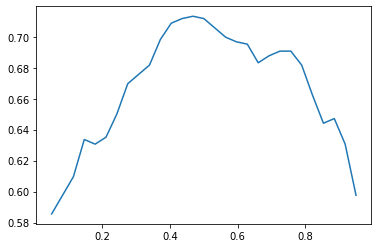

In [50]:
accs = [accuracy_multilabel(preds, targets, tresh=i)  for i in xs]
plt.plot(xs, accs)